In [1813]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('credit_card_churn.csv', header=0)


In [1814]:
#Note: Please ignore the last 2 columns (Naive Bayes Classification), we suggest better delete it before doing anything.
df = df.iloc[:,0:21]

# Data Exploration


In [1815]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [1816]:
categorical_feature = list(df.select_dtypes('object').columns)
categorical_feature.remove('Attrition_Flag')
numeric_feature = list(df.select_dtypes(['int64','float64']).columns)

print("Categorical Features : " + str(len(categorical_feature)) + "\nNumerical Features   : " + str(len(numeric_feature)) + "\nOutput Feature       : Attrition_Flag" + "\n=================")
df.info()

Categorical Features : 5
Numerical Features   : 15
Output Feature       : Attrition_Flag
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     1

In [1817]:
#check missing values
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

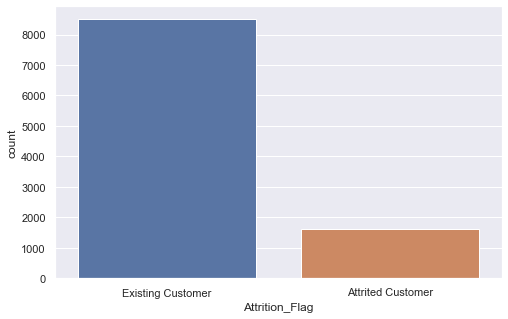

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Percentage of Existing Customer :0.8393403772094401
Percentage of Attrited Customer :0.1606596227905599


In [1818]:
sns.countplot(x="Attrition_Flag",data=df)
plt.show()
print(df['Attrition_Flag'].value_counts())
print("Percentage of Existing Customer :" + str(len(df[df['Attrition_Flag']=='Existing Customer'])/len(df['Attrition_Flag'])))
print("Percentage of Attrited Customer :" + str(len(df[df['Attrition_Flag']=='Attrited Customer'])/len(df['Attrition_Flag'])))

- Imbalance Class Dataset  ข้อมูลของคลาสมีจำนวนที่ห่างกันมากถึง 5 เท่า

# Numerical Data

Correlation between feature

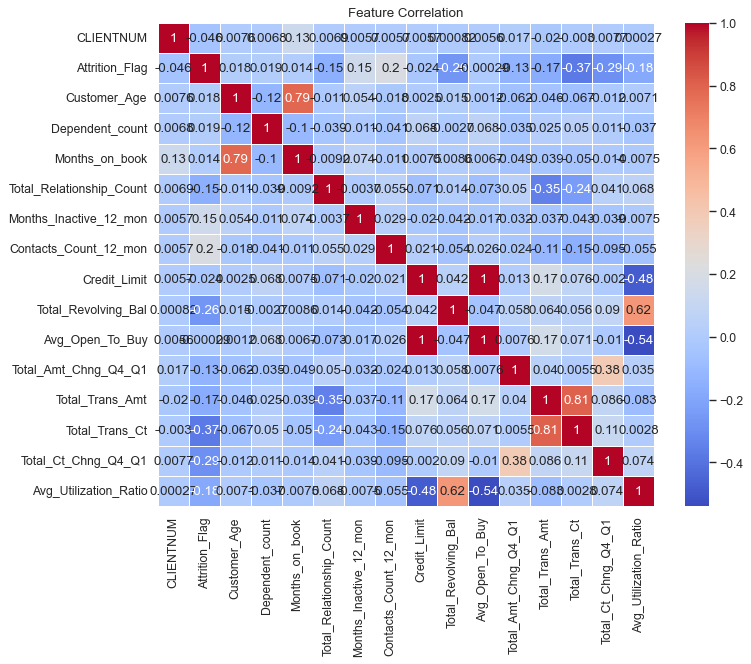

In [1819]:
plt.figure(figsize=(10,8),dpi=80)
df2 = df.copy()
plt.title('Feature Correlation')
df2['Attrition_Flag'] = df2['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'], [0,1])
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
del df2

จาก Correlation ของ Heatmap ที่ได้พบว่ามี Feature ทั้งหมด 6 feature ที่มีความ correlate กับ Attrition Flag น้อยมาก ซึ่งได้แก่
* Customer_Age
* Dependent_count
* Months_on_book
* Credit_Limit
* Avg_Open_To_Buy
* ClientNum



และมี Feature ที่มี Correlation กับ Output variable  โดยที่มีค่า Correlate ดังนี้
- Total_Trans_Ct              0.37
- Total_Ct_Chng_Q4_Q1        0.29
- Total_Revolving_Bal         0.26
- Contacts_Count_12_mon      0.2
- Avg_Utilization_Ratio       0.18
- Total_Trans_Amt             0.17
- Total_Relationship_Count    0.15
- Months_Inactive_12_mon     0.15
- Total_Amt_Chng_Q4_Q1        0.13


 




และเมื่อดูจาก Correlation ของแต่ละ feature พบว่าแต่ละ feature ที่มีความสัมพันธ์ร่วมกัน หรือ Correlate ร่วมกันสูงมีดังนี้ ในขณะเดียวกันนั้น Feature ทั้งสองก็ยังมี Correlate ร่วมกับกับ Output ที่สูงด้วย
* Avg_Utilization_Ratio && Total_Revolving_Bal 0.62
* Total_Trans_Ct && Total_Trans_Amt 0.81


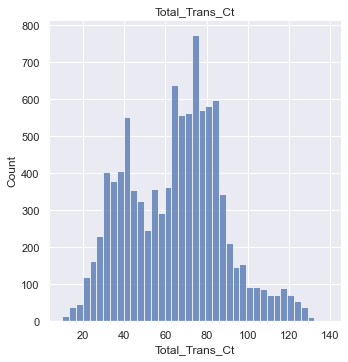

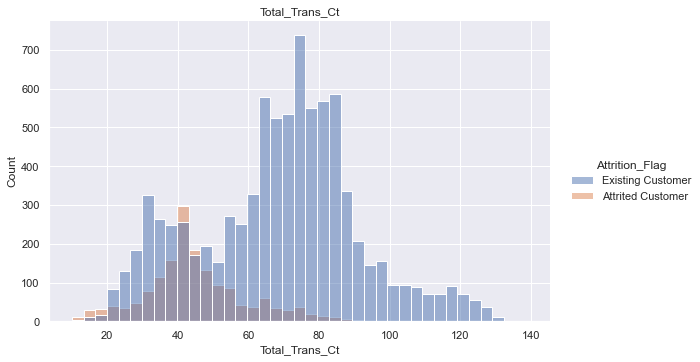

In [1820]:
df_select_numeric = ['Total_Trans_Ct','Total_Amt_Chng_Q4_Q1','Total_Revolving_Bal','Contacts_Count_12_mon','Avg_Utilization_Ratio','Total_Trans_Amt','Total_Relationship_Count','Total_Ct_Chng_Q4_Q1','Months_Inactive_12_mon','Months_Inactive_12_mon']

name = df_select_numeric[0]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

จากกราฟข้อมูลจำนวน Transaction ที่ลูกค้าใช้งานทั้งหมดพบว่าลูกค้าโดยเฉลี่ยส่วนใหญ่จะมีปริมาณธุรกรรมอยู่ในช่วง 60 - 80 ในขณะที่ช่วงจำนวนในการทำธุรกรรมทั้งหมด 30 - 50 ครั้ง เป็นจำนวนที่มีลูกค้าที่เลิกใช้บริการมากที่สุด

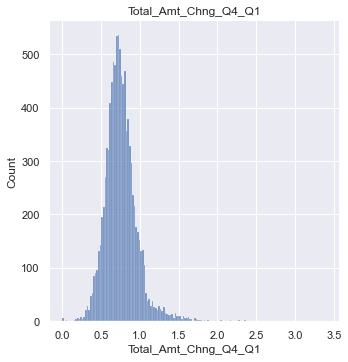

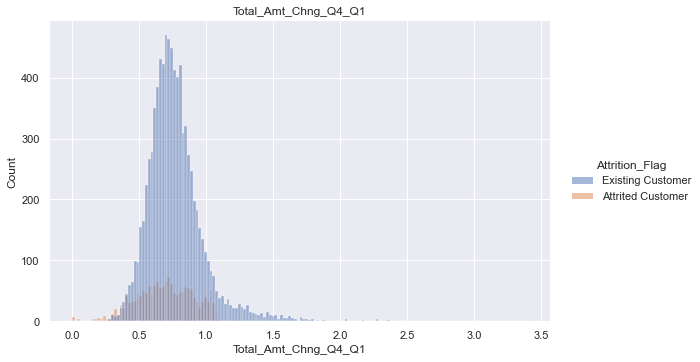

In [1821]:
name = df_select_numeric[1]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

ยอดการเปลี่ยนแปลงของ Transaction จากกราฟข้อมูลจะสามารถยบอกได้ว่าหากมีการเปลี่ยนแปลง Transaction ที่มากกว่า ช่วง 1.2 ลูกค้าจะยังใช้บริการ Credit card อยู่ ในขณะที่ช่วงที่น้อยกว่า 0.5 จะมีอัตราการการเลิกใช้ของผู้ใช้งานมากกว่าปกติ

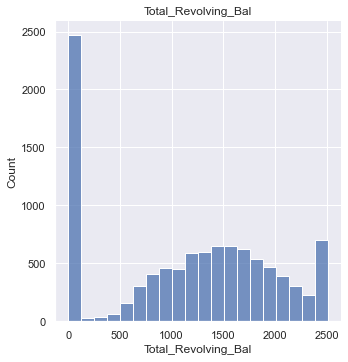

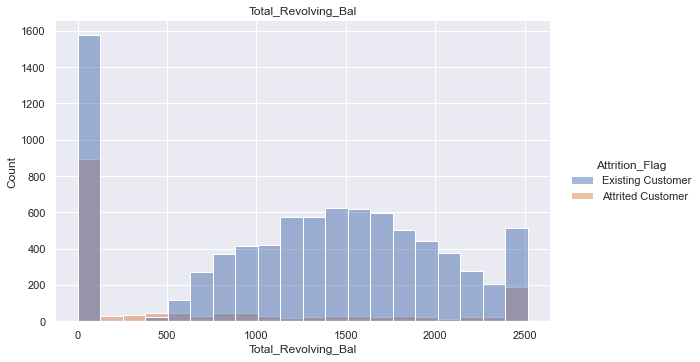

In [1822]:
name = df_select_numeric[2]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

ยอดเงินหมุนเวียนพบว่าส่วนใหญ่มีเงินหมุนเวียนน้อยกว่า 500 และอัตราส่วนต้องผู้เลิกใช้งานก็มีมากกว่า 50 % ในขณะช่วงคนที่มีเงินหมุนเวียน ยังคงใช้งานบริการอยู่เป็นจำนวนมาก 

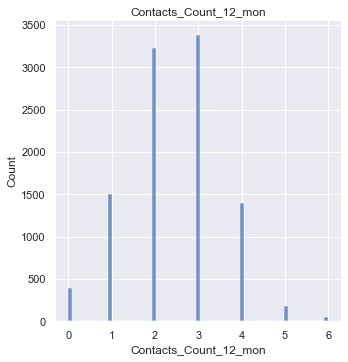

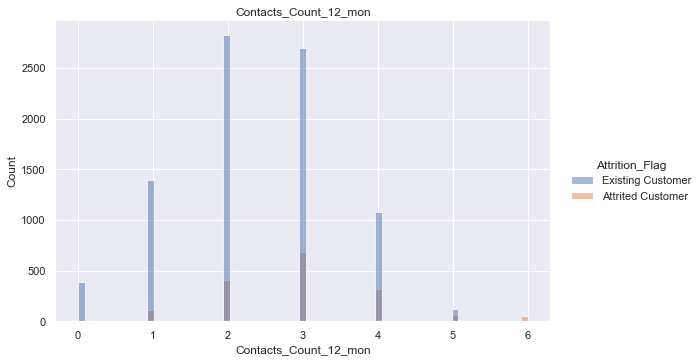

In [1823]:
name = df_select_numeric[3]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

จำนวนการติดต่อในช่วง 12 เดือนที่ผ่านมา มีแนวโน้มว่าหากลูกค้ามีการติดต่อกับธนาคารที่มากขึ้น ลูกค้ามีแนวโน้มที่จะยกเลิกการใช้บริการ โดยสามารถสังเกตุได้ตั้งแต่การติดต่อครั้งที่ 3 เป็นต้นไปที่อัตราส่วนของผู้เลิกใช้บริการเริ่มมีมากขึ้นเรื่อย ๆ ในแต่ละช่วงจำนวนการติดต่อ

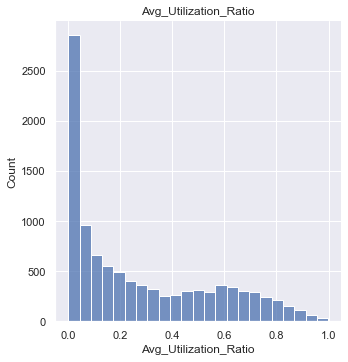

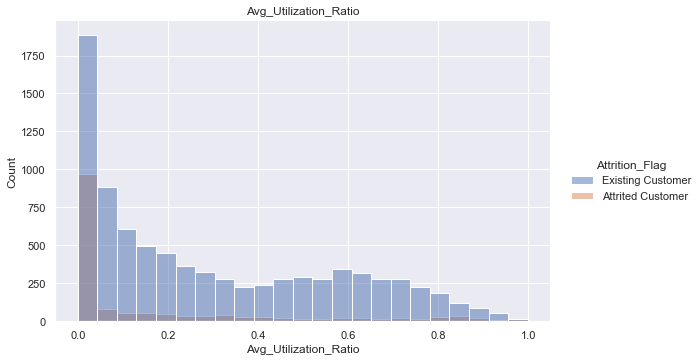

In [1824]:
name = df_select_numeric[4]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

ค่าเฉลี่ยอัตราส่วนระหว่างยอดเงินในบัตรเครดิต และลิมิตของเครดิตการ์ด ซึ่งจากกราฟจะสังเกตุได้ว่าโดยเฉลี้ยนแล้วคนส่วนใหญ่ไม่มียอดคงเหลืออยู่ภายในบัตรเครดิต เมื่อนำมาเทียบกับอัตราส่วนกับลิมิตของเครดิตการ์ดจึงมีค่าเท่ากับศุนย์ ดังนั้นคนที่มีค่าเฉลี่ยอัตราส่วน = 0 ก็อาจจะมีแนวโน้มที่จะยกเลิกการใช้บริการมากกว่าคนทั่วไป

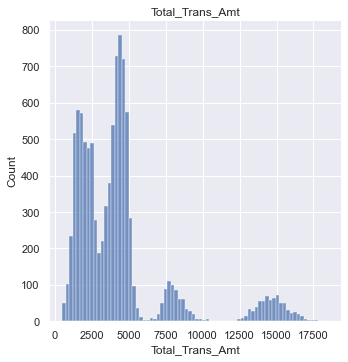

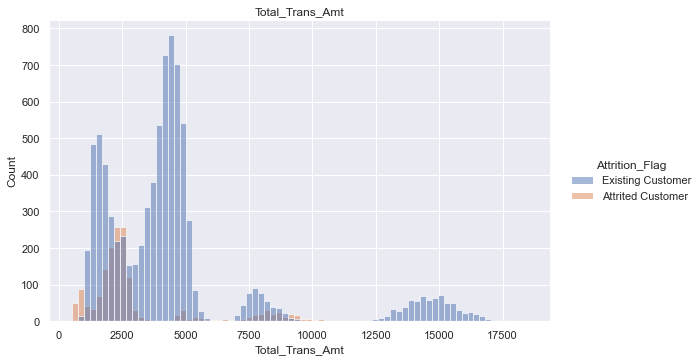

In [1825]:
name = df_select_numeric[5]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

จากกราฟข้อมูลยอดการใช้เงินในช่วง 12 เดือนที่ผ่านมาพบว่า คนส่วนใหญ่จะใช้เงินอยู่ในช่วงเฉลี่ย 0 - 5000 โดยที่ส่วนใหญ่หากมีจำนวนการใช้เงินมากกว่า 12500 จะยังคงเป็นผู้ที่ใช้บริการอยู่แต่ในขณะเดียวกัน ผู้ใช้บริการที่อยู่ในช่วง < 2500 มีแนวโน้มที่จะเลิกใช้บริการมากกว่าปกติ

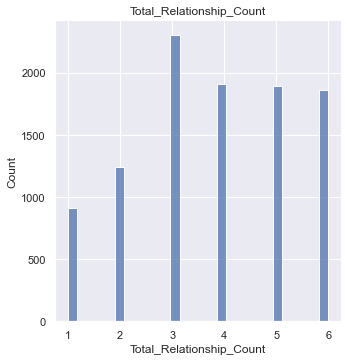

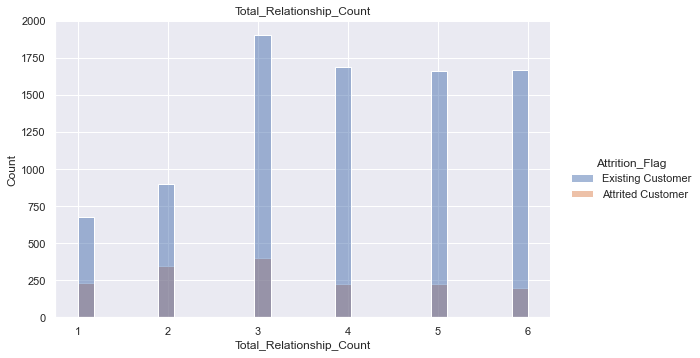

In [1826]:
name = df_select_numeric[6]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

จำนวนโปรดักส์ของลูกค้า (Total number of products held by the customer) จากกราฟจะสังเกตุได้ว่าในช่วงโปรดักส์ 1 - 2 จะมีอัตตราการเลิกใช้งานบริการสูงมากกว่า จำนวน 3 - 6

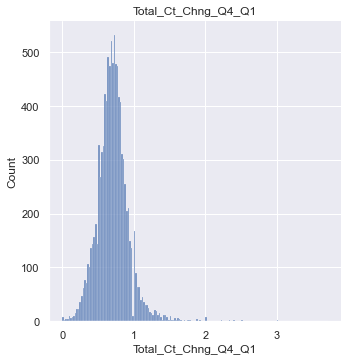

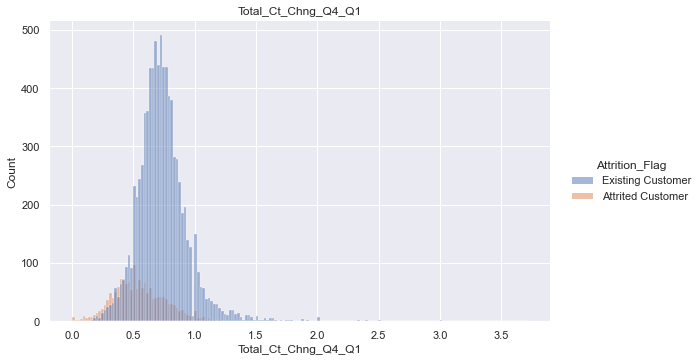

In [1827]:
name = df_select_numeric[7]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

ช่วงกราฟในช่วง 0 - 0.5 ผู้ใช่งานมีแนวโน้มที่จะเลิกใช้บริการมากที่สุด

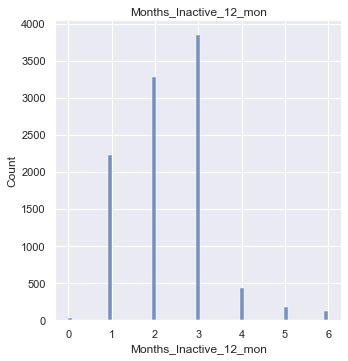

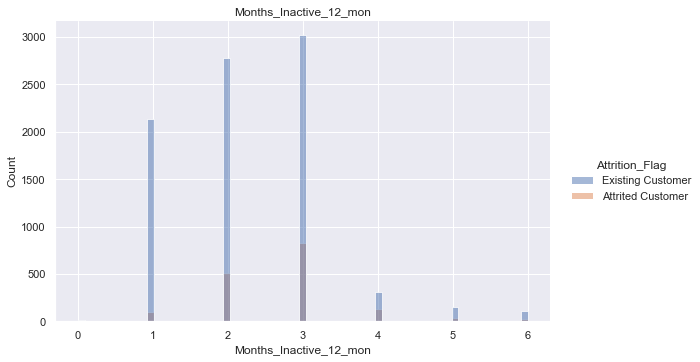

In [1828]:
name = df_select_numeric[8]
sns.displot(x=df[name]).set(title=name)
sns.displot(x=df[name],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title=name)

จำนวนเดือนที่ลูกค้าไม่มีการใช้บริการมากที่สุดจะอยู่ในช่วง 2 - 3 เดือน โดยที่จะมีแนวโน้มที่จะเลิกใช้งานบริการตั้งแต่เดือนที่ 3 มากที่สุดแต่กลับพบว่า เดือนที่ 5 หรือเดือนที่ 6 ไม่ได้มีแนวโน้มของลูกค้าที่จะยกเลิกการใช้บริการที่มากขึ้น

In [1829]:
df_select_numeric.remove('Months_Inactive_12_mon')

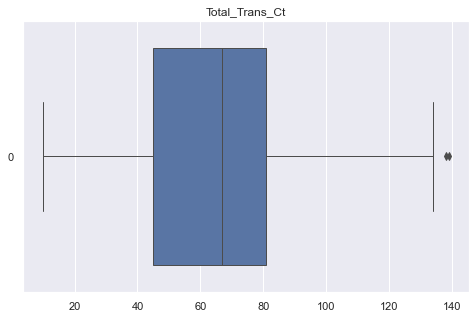

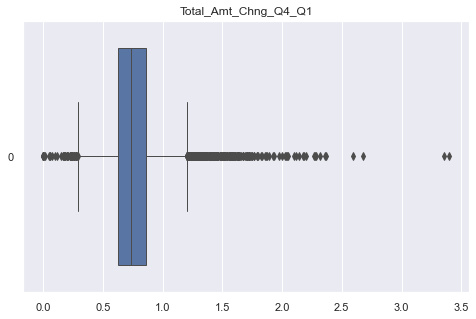

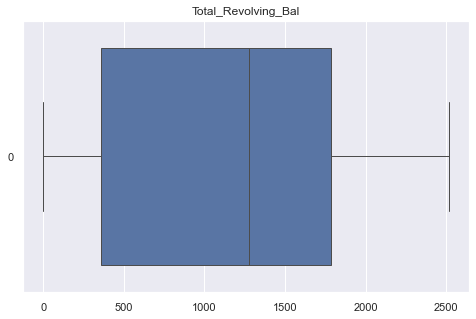

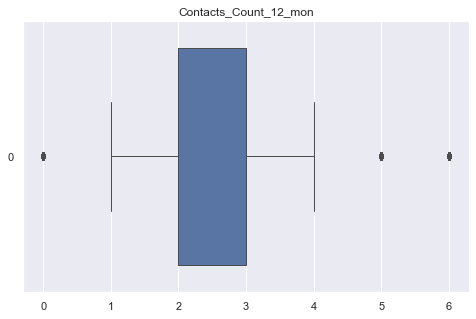

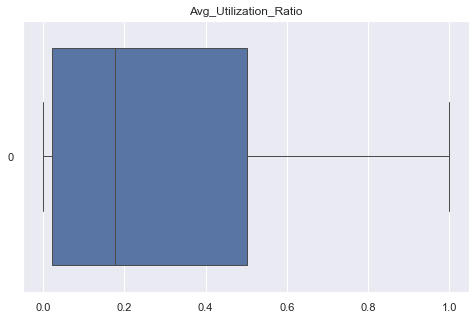

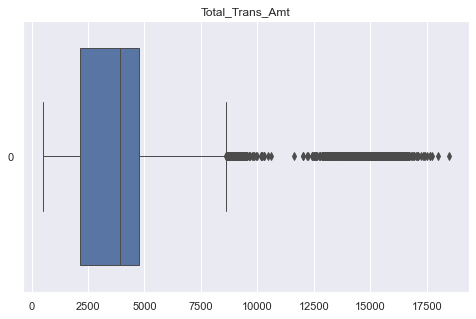

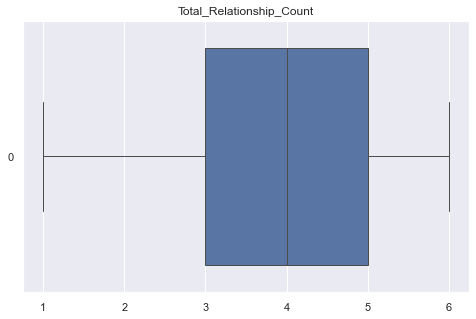

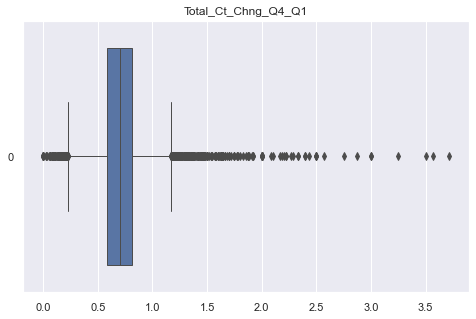

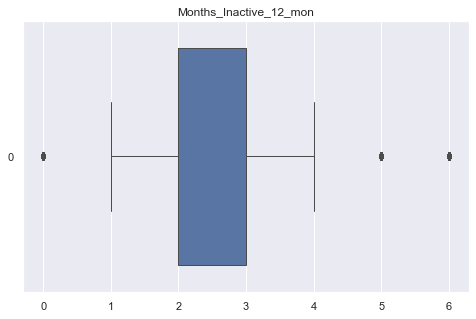

In [1830]:
for col in df_select_numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    sns.boxplot(data= df[col], linewidth= 1.0,orient='h').set(title=col)

In [1831]:
df_outlier = df.loc[(df['Total_Trans_Ct']>130)| ((df['Total_Ct_Chng_Q4_Q1']>1.3) | (df['Total_Ct_Chng_Q4_Q1']<0.3)) | (df['Total_Amt_Chng_Q4_Q1']>1.3)]
#| (df['Total_Trans_Amt']>12500) 

In [1832]:
len(df_outlier)

622

In [1833]:
def ratio_category(class_col,col):
    for i in range(len(class_col)):
        print("Percentage of " + class_col[i]+ " to Flag = Attrited : "+str(len(df.loc[(df[col] == class_col[i]) & (df["Attrition_Flag"] == 'Attrited Customer')])/len(df.loc[(df[col] == class_col[i])])))
    return

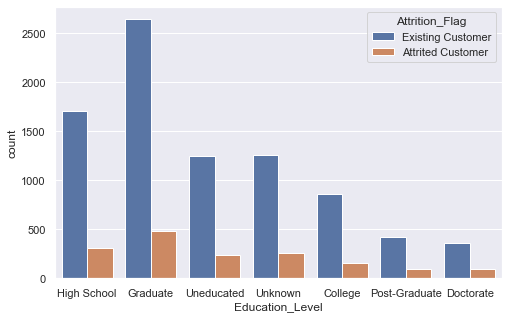

Percentage of Uneducated to Flag = Attrited : 0.1593813046402152
Percentage of High School to Flag = Attrited : 0.15201192250372578
Percentage of Post-Graduate to Flag = Attrited : 0.17829457364341086
Percentage of Graduate to Flag = Attrited : 0.15569053708439898
Percentage of College to Flag = Attrited : 0.15202369200394866
Percentage of Doctorate to Flag = Attrited : 0.2106430155210643
Percentage of Unknown to Flag = Attrited : 0.1685319289005925


In [1834]:
sns.countplot(x="Education_Level",hue="Attrition_Flag",data=df)
plt.show()
ratio_category(['Uneducated','High School','Post-Graduate','Graduate','College','Doctorate','Unknown'],'Education_Level')

- จากกราฟ จะเห็นได้ว่าอัตราส่วนของ Education Level โดยเทียบกับ Attrition Flag พบว่า Doctorate มีอัตราส่วนระหว่าง Class Attrited:Existing Customer มากที่สุด
- โดยมีลูกค้าส่วนใหญ่มีการศึกษาตั้งแต่ Graduate เป็นต้นไปมากที่สุด

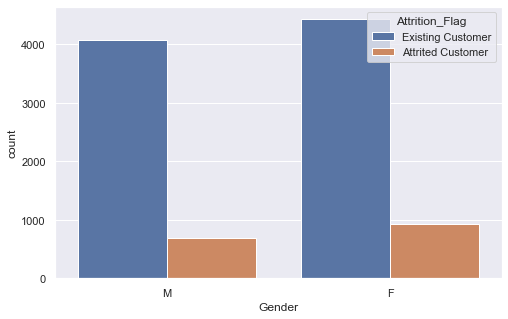

Percentage of M to Flag = Attrited : 0.14615223317257287
Percentage of F to Flag = Attrited : 0.17357222844344905


In [1835]:
sns.countplot(x="Gender",hue="Attrition_Flag",data=df)
plt.show()
ratio_category(['M','F'],'Gender')

- จากกราฟอัตราส่วนของข้อมูลระหว่างผู้ชายและผู้หญิงที่ พบว่าเพศให้ผลลัพธ์หรือ Class Output มีค่าใกล้เคียงกัน แต่โดยอัตราส่วนแล้วมีโอกาสที่ผู้หญิงเลิกใช้งานมากกว่าผู้ชาย

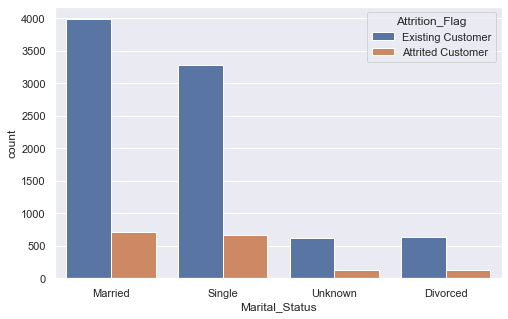

Percentage of Married to Flag = Attrited : 0.15126946874333264
Percentage of Single to Flag = Attrited : 0.16941415166117169
Percentage of Unknown to Flag = Attrited : 0.17222963951935916
Percentage of Divorced to Flag = Attrited : 0.16176470588235295


In [1836]:
sns.countplot(x="Marital_Status",hue="Attrition_Flag",data=df)
plt.show()
ratio_category(["Married","Single","Unknown","Divorced"],"Marital_Status")

- จากกราฟข้อมูลลูกค้าส่วนใหญ่จะเป็นลูกค้าที่แต่งงานแล้ว และรองลงมาคือคนที่ยังโสด  โดยที่คนที่โสดจะมีอัตราส่วนที่จะถูกจัดอยู่ในประเภท Attrited Customer มากกว่า คนที่แต่งงานแล้ว แต่ค่าก็ยังไม่แตกต่างกันจนเห็นได้ชัดมากนัก

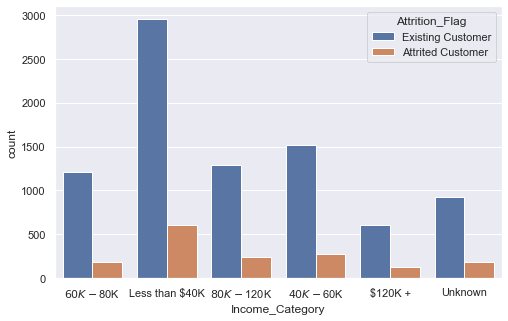

Percentage of Less than $40K to Flag = Attrited : 0.17186183656276327
Percentage of $40K - $60K to Flag = Attrited : 0.15139664804469274
Percentage of $60K - $80K to Flag = Attrited : 0.13480741797432239
Percentage of $80K - $120K to Flag = Attrited : 0.15765472312703582
Percentage of $120K + to Flag = Attrited : 0.1733149931224209
Percentage of Unknown to Flag = Attrited : 0.1681654676258993


In [1837]:
sns.countplot(x="Income_Category",hue="Attrition_Flag",data=df)
plt.show()
ratio_category(['Less than $40K',"$40K - $60K",'$60K - $80K','$80K - $120K','$120K +',"Unknown"],"Income_Category")

- จากข้อมูลพบว่าผู้ที่ยังใช้งานส่วนใหญ่มีรายได้เฉลี่ยอยู่ที่น้อยกว่า 40K และรองลงมาคือ 40K-60K และช่วงรายได้ที่ยังเป็นลูกค้าที่ใช้งานอยู่ปัจจุบันมากที่สุดคือในช่วง 60K-80K

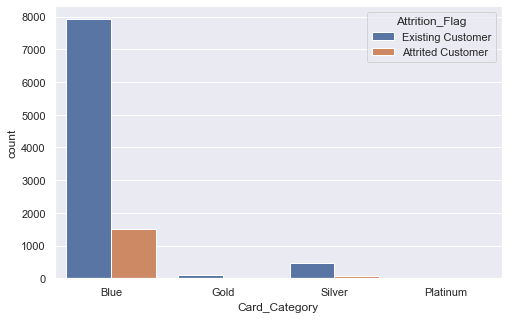

Percentage of Blue to Flag = Attrited : 0.1609792284866469
Percentage of Gold to Flag = Attrited : 0.1810344827586207
Percentage of Silver to Flag = Attrited : 0.14774774774774774
Percentage of Platinum to Flag = Attrited : 0.25


In [1838]:
sns.countplot(x="Card_Category",hue="Attrition_Flag",data=df)
plt.show()
ratio_category(["Blue","Gold","Silver","Platinum"],"Card_Category")

# Feature Selection

Numeical data
-
Feature ที่เลือก โดยที่เลือก Base on จาก Correlation ระหว่าง Feature และ Output
- 'Total_Trans_Ct'   - จำนวน Transaction ทั้งหมด
- 'Total_Amt_Chng_Q4_Q1' - การเปลี่ยนแปลงยอดของ Transaction ตั้งแต่ Q4-Q1
- 'Total_Revolving_Bal' - ยอดหมุนเวียนในบัญชีหรือ Credit card
- 'Contacts_Count_12_mon' - จำนวนครั้งในการติดต่อตั้งแต่ 12 เดือนที่ผ่านมา
- Months_Inactive_12_mon - จำนวนเดือนที่ไม่มีการใช้งานในช่วง 12 เดือนที่ผ่านมา
- 'Avg_Utilization_Ratio' - ค่าเฉลี่ยอัตราส่วนระหว่าง ยอดคงเหลือของเครดิตการ์ด และยอดลิมิตของเครดิตการ์ด
- 'Total_Trans_Amt'     -   จำนวน Transaction ในช่วง 12 เดือนที่ผ่านมา
- 'Total_Relationship_Count' - จำนวนโปรดักส์ที่ลูกค้ามี
- 'Total_Ct_Chng_Q4_Q1' - ยอดการเปลี่ยนแปลงรายการทั้งหมด

Categorical Data
- Education Level
- Gender
- Income_Category
- Card_Category

In [1839]:

df_clean = df.copy()
#Cut Outlier
df_clean = pd.concat([df_clean, df_outlier, df_outlier]).drop_duplicates(keep=False)
#Feature Selection
df_select = df_select_numeric
select_cat = ['Education_Level','Gender','Income_Category','Card_Category']
for i in select_cat:
    df_select.append(i)


In [1840]:
df_select_numeric

['Total_Trans_Ct',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Revolving_Bal',
 'Contacts_Count_12_mon',
 'Avg_Utilization_Ratio',
 'Total_Trans_Amt',
 'Total_Relationship_Count',
 'Total_Ct_Chng_Q4_Q1',
 'Months_Inactive_12_mon',
 'Education_Level',
 'Gender',
 'Income_Category',
 'Card_Category']

# Data Preprocessing

In [1841]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

benchmark_X = df.loc[:,df.columns!='Attrition_Flag']
benchmark_Y = df.loc[:,'Attrition_Flag']
benchmark_X = pd.get_dummies(benchmark_X)



In [1842]:
X = df_clean.loc[:,df_select]
Y = df_clean['Attrition_Flag']

Normalization Data

การจัดการกับ Distribution ของข้อมูล โดยใช้รากที่สองและ ลอการิทึม

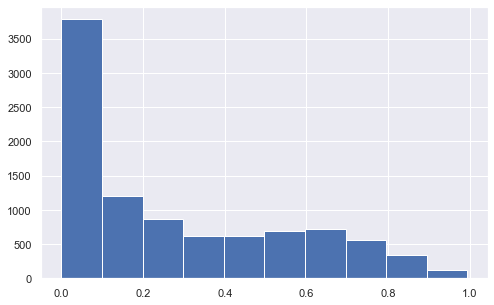

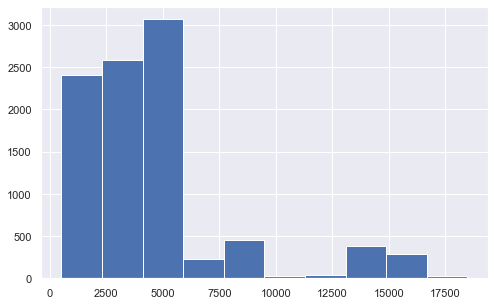

In [1843]:
plt.hist(X['Avg_Utilization_Ratio'])
plt.show()
plt.hist(X['Total_Trans_Amt'])
plt.show()


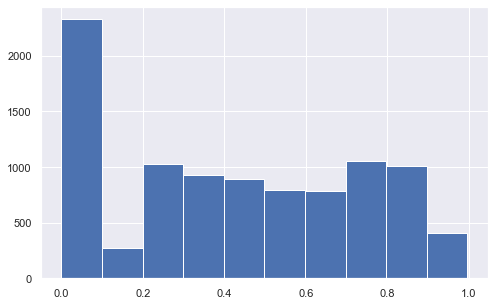

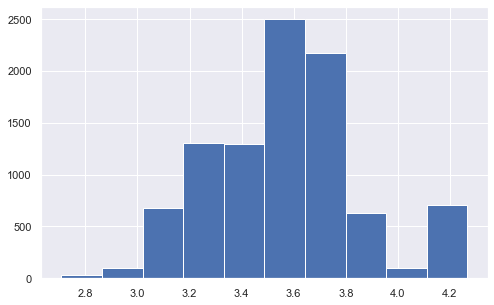

In [1844]:
plt.hist(X['Avg_Utilization_Ratio']**(1/2))
plt.show()
plt.hist(np.log10(X['Total_Trans_Amt']+1))
plt.show()

In [1845]:
X['Avg_Utilization_Ratio'] = X['Avg_Utilization_Ratio']**(1/2)
X['Total_Trans_Amt'] = np.log10(X['Total_Trans_Amt']+1)

In [1846]:
X['Gender'] = X['Gender'].replace(['M','F'], [1,0])

In [1847]:
X

,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Revolving_Bal,Contacts_Count_12_mon,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Relationship_Count,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon,Education_Level,Gender,Income_Category,Card_Category
10,42,0.831,1467,2,0.465833,3.079904,5,0.680,3,Uneducated,1,$120K +,Blue
14,29,1.190,680,2,0.528205,3.196176,5,0.611,2,Graduate,0,Less than $40K,Blue
19,21,0.966,1157,2,0.282843,3.082067,6,0.909,1,Graduate,0,Unknown,Blue
20,27,0.906,1800,0,0.293258,3.071514,5,0.929,2,Doctorate,1,$60K - $80K,Blue
21,16,1.047,0,3,0.000000,2.840733,2,0.600,3,Graduate,0,Less than $40K,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,117,0.703,1851,3,0.679706,4.189687,3,0.857,2,Graduate,1,$40K - $60K,Blue
10123,69,0.804,2186,3,0.714843,3.942752,4,0.683,2,Unknown,1,$40K - $60K,Blue
10124,60,0.819,0,4,0.000000,4.012500,5,0.818,3,High School,0,Less than $40K,Blue
10125,62,0.535,0,3,0.000000,3.924072,4,0.722,3,Graduate,1,$40K - $60K,Blue


Feature Selection Chi-2

In [1848]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x_num = pd.get_dummies(benchmark_X)
x_num.drop(columns='CLIENTNUM',axis=1,inplace=True)
selector = SelectKBest(chi2, k=9)     
x_new = selector.fit(x_num,benchmark_Y)             
col = selector.get_support(indices=True)   
x_new = x_num.iloc[:,col]

In [1849]:
print(x_new.columns)

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')


In [1850]:
print(X.columns)

Index(['Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Revolving_Bal',
       'Contacts_Count_12_mon', 'Avg_Utilization_Ratio', 'Total_Trans_Amt',
       'Total_Relationship_Count', 'Total_Ct_Chng_Q4_Q1',
       'Months_Inactive_12_mon', 'Education_Level', 'Gender',
       'Income_Category', 'Card_Category'],
      dtype='object')


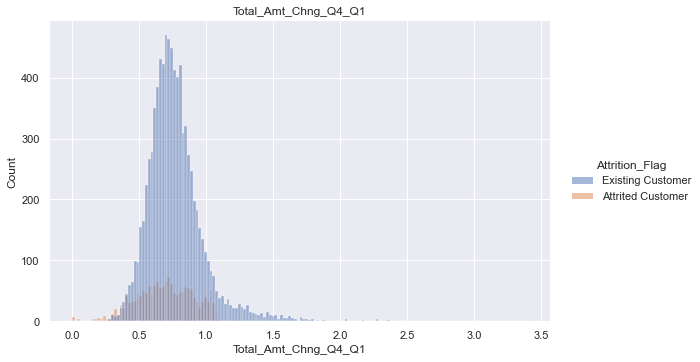

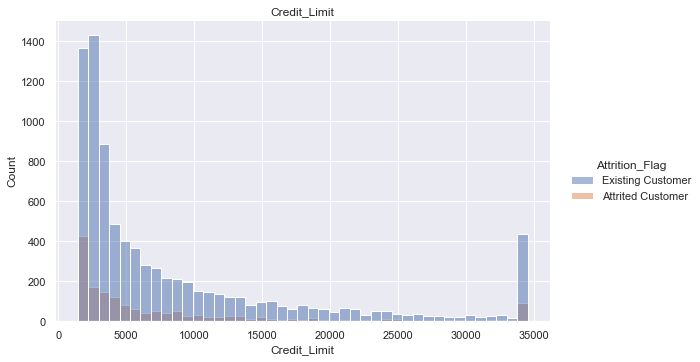

In [1851]:
sns.displot(x=df['Total_Amt_Chng_Q4_Q1'],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title='Total_Amt_Chng_Q4_Q1')
sns.displot(x=df['Credit_Limit'],hue=df['Attrition_Flag'], height=5, aspect=1.6).set(title='Credit_Limit')

In [1853]:
numeric_feature = list(X.select_dtypes(['int64','float64']).columns)
scaler = preprocessing.MinMaxScaler()
X[numeric_feature] = scaler.fit_transform(X[numeric_feature])
X[numeric_feature]

,Credit_Limit,Total_Trans_Ct,Total_Revolving_Bal,Contacts_Count_12_mon,Avg_Utilization_Ratio,Total_Trans_Amt,Total_Relationship_Count,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon,Gender
10,0.160522,0.266667,0.582837,0.333333,0.467236,0.238375,0.8,0.380,0.500000,1.0
14,0.030162,0.158333,0.270163,0.333333,0.529796,0.312985,0.8,0.311,0.333333,0.0
19,0.393972,0.091667,0.459674,0.333333,0.283695,0.239763,1.0,0.609,0.166667,0.0
20,0.590751,0.141667,0.715137,0.000000,0.294141,0.232991,0.8,0.629,0.333333,1.0
21,0.000000,0.050000,0.000000,0.500000,0.000000,0.084903,0.2,0.300,0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...
10122,0.077536,0.891667,0.735399,0.500000,0.681754,0.950505,0.4,0.557,0.333333,1.0
10123,0.085819,0.491667,0.868494,0.500000,0.716997,0.792051,0.6,0.383,0.333333,1.0
10124,0.120042,0.416667,0.000000,0.666667,0.000000,0.836807,0.8,0.518,0.500000,0.0
10125,0.116172,0.433333,0.000000,0.500000,0.000000,0.780065,0.6,0.422,0.500000,1.0


Categorical Feature

In [1854]:

x_cat = pd.get_dummies(X[select_cat])
selector = SelectKBest(chi2, k=4)     
x_new = selector.fit(x_cat,Y)             
col = selector.get_support(indices=True)   
x_new = x_cat.iloc[:,col]


In [1855]:
scaler = preprocessing.MinMaxScaler()
benchmark_X = scaler.fit_transform(benchmark_X)

In [1856]:
x_new.columns

Index(['Gender', 'Education_Level_Doctorate', 'Income_Category_$60K - $80K',
       'Income_Category_Less than $40K'],
      dtype='object')

In [1857]:
X.drop(columns=select_cat,axis=1,inplace=True)
X = pd.concat([X,x_new],axis=1)

PCA Correlate

Feature ที่จะนำเข้าทำ PCA
- 'Avg_Utilization_Ratio' และ  'Total_Revolving_Bal'
- 'Total_Trans_Amt' และ 'Total_Trans_Ct'
 * เนื่องจากทั้ง 2 ความสัมพันธ์นี้เป็น Feature ที่ทำหน้าที่เก็บข้อมูลชนิดหรือประเภทใกล้เคียงกัน และมีค่า Correlate ระหว่างกันเองสูงมากกว่า 0.6

<AxesSubplot:title={'center':'Feature Correlation'}>

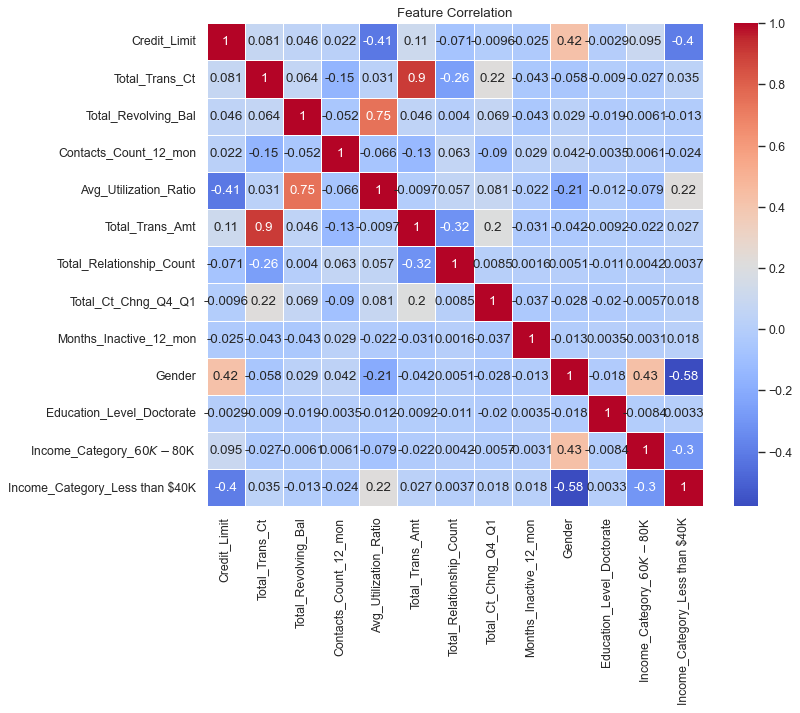

In [1858]:
plt.figure(figsize=(10,8),dpi=80)
plt.title('Feature Correlation')
sns.heatmap(X.corr(),cmap="coolwarm",annot=True,linewidth=0.5)


In [1859]:
corr_feature = [['Avg_Utilization_Ratio','Total_Revolving_Bal'],['Total_Trans_Amt','Total_Trans_Ct']]

In [1860]:
pca = PCA(n_components = 1)
X_pca = X.copy()
for i in range(len(corr_feature)):
    name = 'principal component' + str(i+1)
    pca_feature = pd.concat((X.loc[:,corr_feature[i][0]],X.loc[:,corr_feature[i][1]]),axis=1)
    pca_component = pca.fit_transform(pca_feature)
    pca_df = pd.DataFrame(data = pca_component,columns=[name])

    X_pca.insert(0,column=name,value=pca_component)
    X_pca.drop(columns=corr_feature[i],inplace=True)


<AxesSubplot:title={'center':'Feature Correlation'}>

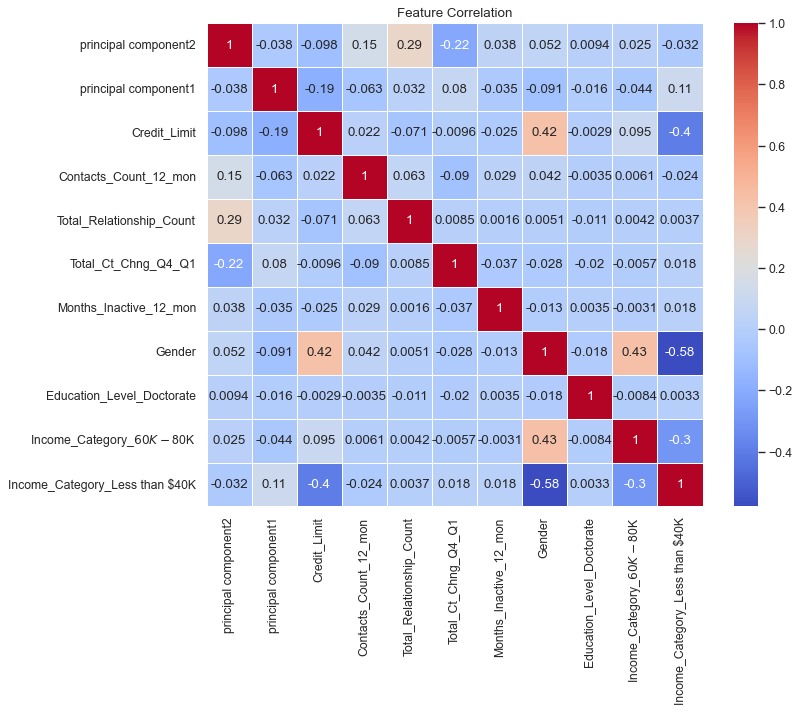

In [1861]:
plt.figure(figsize=(10,8),dpi=80)
plt.title('Feature Correlation')
sns.heatmap(X_pca.corr(),cmap="coolwarm",annot=True,linewidth=0.5)


# Train Test Data Preparation

In [1862]:
test_size = 0.3
from sklearn.model_selection import train_test_split
#Benchmark 
x_train_bn, x_test_bn, y_train_bn, y_test_bn = train_test_split(benchmark_X, benchmark_Y, test_size=test_size,random_state= 1)
# normal selection data without PCA
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,random_state= 0)
# data with pca
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=test_size,random_state= 0)

Oversampler for imbalance class


In [1863]:
from imblearn.over_sampling import SMOTE

x_train, y_train = SMOTE().fit_resample(x_train, y_train)
x_train_pca , y_train_pca = SMOTE().fit_resample(x_train_pca , y_train_pca)

Attrited Customer    5618
Existing Customer    5618
Name: Attrition_Flag, dtype: int64
Benchmark Data


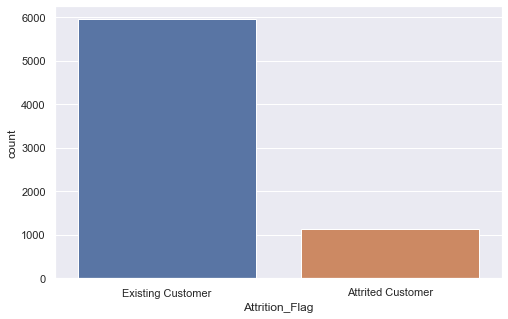

Data Preprocess w/o PCA


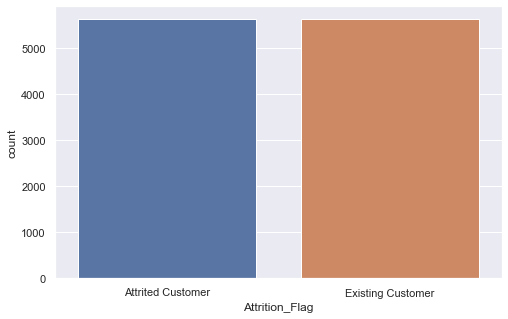

Data Preprocess w/ PCA


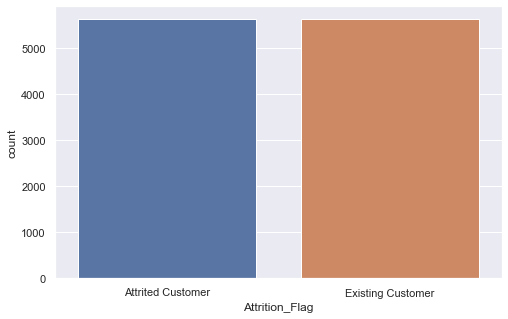

In [1864]:
print(y_train.value_counts())

print('Benchmark Data')
sns.countplot(x=y_train_bn,data=y_train_bn)
plt.show()
print('Data Preprocess w/o PCA')
sns.countplot(x=y_train,data=y_train)
plt.show()
print('Data Preprocess w/ PCA')
sns.countplot(x=y_train_pca,data=y_train_pca)
plt.show()

# Model Machine Learning   

In [1865]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

clf_rf = RandomForestClassifier(random_state=0)
clf_knn = KNeighborsClassifier()
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_nn = MLPClassifier(random_state=0)

In [1866]:
def model_train_predict(model,x,y,test_x,test_y):
    model.fit(x,y)
    y_predict = model.predict(test_x)
    report = classification_report(test_y,y_predict)
    cm = confusion_matrix(test_y,y_predict)
    return cm , report

def result(confusion,report,model_num):
    model = ['Random forest','Decision Tree','K-nearest Neigbors','Neural Network']
    ax= plt.subplot()
    sns.heatmap(confusion, annot=True, fmt='g', ax=ax,cmap="Blues")
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Attired Customer', 'Existing Customer']); ax.yaxis.set_ticklabels(['Attired Customer', 'Existing Customer']);
    print('\n'+'\n' + "Classification Report :  " + model[model_num] +  '\n' + report  )
    return

# Experiment 1 PCA / CHI-2

# Decision Tree



Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.69      0.81      0.75       423
Existing Customer       0.97      0.94      0.95      2429

         accuracy                           0.92      2852
        macro avg       0.83      0.88      0.85      2852
     weighted avg       0.93      0.92      0.92      2852



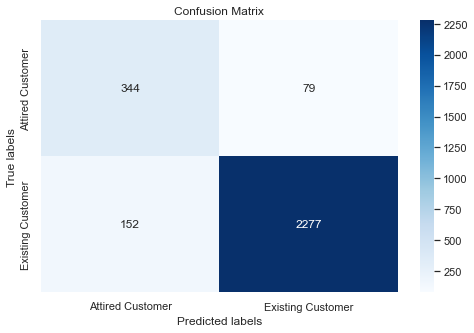

In [1867]:
cm_tree , report_tree = model_train_predict(clf_tree,x_train,y_train,x_test,y_test)
result(cm_tree,report_tree,0)



Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.61      0.73      0.67       423
Existing Customer       0.95      0.92      0.94      2429

         accuracy                           0.89      2852
        macro avg       0.78      0.82      0.80      2852
     weighted avg       0.90      0.89      0.90      2852



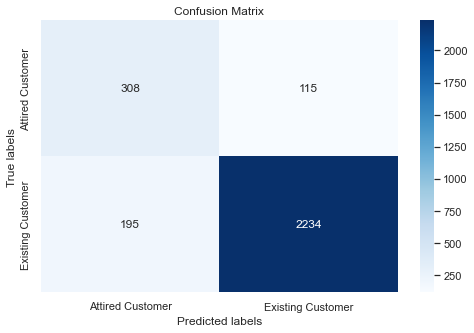

In [1868]:
cm_tree_pca , report_tree_pca = model_train_predict(clf_tree,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_tree_pca,report_tree_pca,0)

# Random Forest



Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.82      0.90      0.86       423
Existing Customer       0.98      0.97      0.97      2429

         accuracy                           0.96      2852
        macro avg       0.90      0.93      0.91      2852
     weighted avg       0.96      0.96      0.96      2852



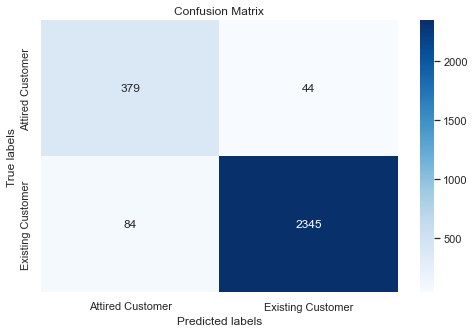

In [1869]:
cm_rf , report_rf = model_train_predict(clf_rf,x_train,y_train,x_test,y_test)
result(cm_rf,report_rf,0)



Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.76      0.77      0.76       423
Existing Customer       0.96      0.96      0.96      2429

         accuracy                           0.93      2852
        macro avg       0.86      0.86      0.86      2852
     weighted avg       0.93      0.93      0.93      2852



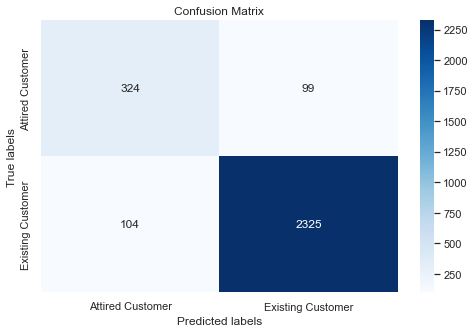

In [1870]:
cm_rf_pca , report_rf_pca = model_train_predict(clf_rf,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_rf_pca,report_rf_pca,0)

# K-nearest Neighbors



Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.52      0.79      0.62       423
Existing Customer       0.96      0.87      0.91      2429

         accuracy                           0.86      2852
        macro avg       0.74      0.83      0.77      2852
     weighted avg       0.89      0.86      0.87      2852



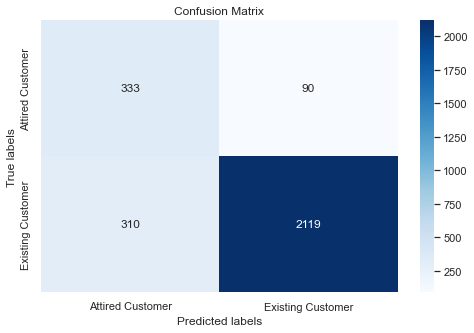

In [1871]:
cm_knn , report_knn = model_train_predict(clf_knn,x_train,y_train,x_test,y_test)
result(cm_knn,report_knn,0)



Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.48      0.73      0.58       423
Existing Customer       0.95      0.86      0.90      2429

         accuracy                           0.84      2852
        macro avg       0.71      0.80      0.74      2852
     weighted avg       0.88      0.84      0.85      2852



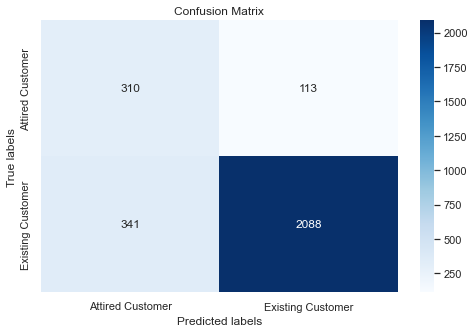

In [1872]:
cm_knn_pca , report_knn_pca = model_train_predict(clf_knn,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_knn_pca,report_knn_pca,0)

- จากการทดลอง Train และ Predict Model ทั้งสองแบบเพื่อตรวจสอบดูระหว่างการทำ PCA และไม่ทำ PCA พบว่าการทำ PCA ส่งผลให้ค่าความแม่นยำของโมเดลลดลง ไม่ว่าจะเป็น Random Forest หรือ Decision Tree

Data Exploration PCA

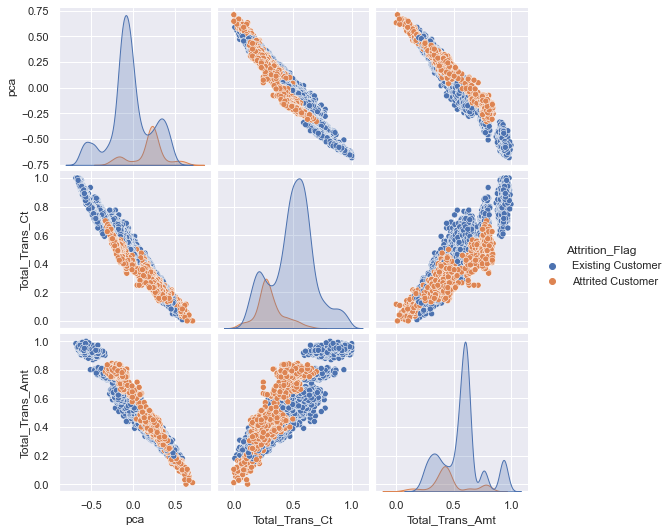

In [1873]:
df2 = X.copy()
df2.insert(0,column='Attrition_Flag',value=df['Attrition_Flag'])
df2.insert(0,column='pca',value=X_pca['principal component2'])
sns.pairplot(df2[['pca','Total_Trans_Ct','Total_Trans_Amt','Attrition_Flag']],hue='Attrition_Flag',data=df)
plt.show()
del df2

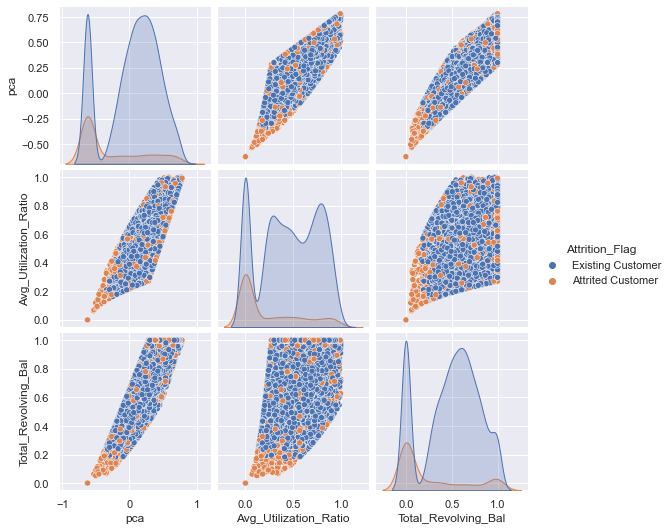

In [1874]:
df2 = X.copy()
df2.insert(0,column='Attrition_Flag',value=df['Attrition_Flag'])
df2.insert(0,column='pca',value=X_pca['principal component1'])
sns.pairplot(df2[['pca','Avg_Utilization_Ratio','Total_Revolving_Bal','Attrition_Flag']],hue='Attrition_Flag',data=df)
plt.show()
del df2

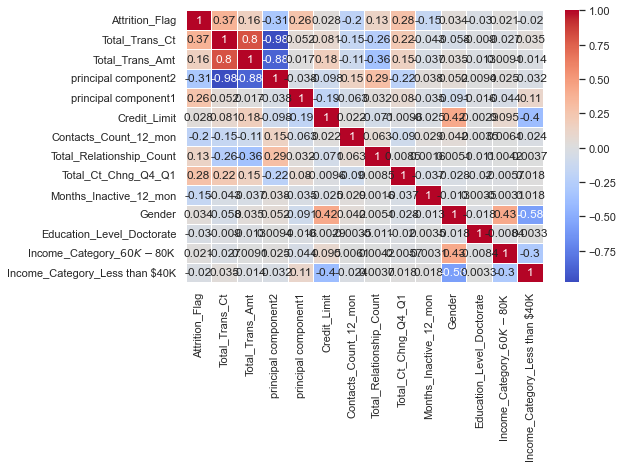

In [1875]:
df2 = X_pca.copy()
df2.insert(0,column='Total_Trans_Amt',value=df['Total_Trans_Amt'])
df2.insert(0,column='Total_Trans_Ct',value=df['Total_Trans_Ct'])
df2.insert(0,column='Attrition_Flag',value=df['Attrition_Flag'])
df2['Attrition_Flag'] = df2['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'], [1,0])
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.show()
del df2

จากกราฟ Pairplot ของ Feature ที่มีความ Correlate กันสูงพบว่า ความสัมพันธ์ระหว่าง Total_trans_amt และ Total_trans_ct มีการเกาะกลุ่มกันอย่างเห็นได้ชัด ซึ่งหลังจากผ่านการทำ PCA อาจจะทำให้ความสัมพันธ์ระหว่างสอง Feature นี้หายทำให้ Model มีการ Predict ที่แย่ลง ในขณะที่ความสัมพันธ์ระหว่าง Avg_Utilization_Ratio และ Total_Revolving_Bal มีการกระจายตัวของ Target class ที่ไม่มีการเกาะกลุ่มกันชัดเจน

โดยพบว่า จาก Feature เดิมที่มีค่า Correlate หรือสามารถอธิบายความสัมพันธ์ระหว่าง Trans_amt และ Attrition flag ที่สูงถึง 0.37 แต่เมื่อผ่านการทำ PCA พบว่าค่าความ Correlate ลดลงเหลือ 0.26 
ในขณะที่ความสัมพันธ์ระหว่าง Avg_Utilization_Ratio และ Total Revolving_Bal มีความ Correlate กับ Attrition flag อยู่สูงสุดอยู่ที่ 0.25 เมื่อผ่านการทำ PCA พบว่ามีความ Correlate กับ Class Output อยู่ที่ 0.24 ซึ่งไม่ห่างกันมากนัก

และเมื่อสังเกตุจาก Correlation พบว่า Categorical Feature ที่ผ่านการทำ CHI-2 มีค่าความ Correlate กับ Output Attrition Flag ใกล้เคียงกับ 0 จึงสันนิษฐานว่า Feature ทั้ง 4 อันนี้ส่งผลต่อการเรียนรู้ของโมเดลน้อยมาก จึงเลือก Drop Feature ทั้ง 4 ทิ้ง

In [1876]:
X.drop(columns=["Gender","Education_Level_Doctorate","Income_Category_$60K - $80K",'Income_Category_Less than $40K'],axis=1,inplace=True)

เลือกทำ PCA เฉพาะ ['Avg_Utilization_Ratio','Total_Revolving_Bal'] และตัด Columns 'Total_Trans_Ct' ทิ้งเนื่องจากมีความ Correlate สูงกับ 'Total_Trans_Amt'

In [1877]:
corr_feature = [['Avg_Utilization_Ratio','Total_Revolving_Bal']]
X_pca = X.copy()
for i in range(len(corr_feature)):
    name = 'principal component' + str(i+1)
    pca_feature = pd.concat((X.loc[:,corr_feature[i][0]],X.loc[:,corr_feature[i][1]]),axis=1)
    pca_component = pca.fit_transform(pca_feature)
    pca_df = pd.DataFrame(data = pca_component,columns=[name])
    X_pca.insert(0,column=name,value=pca_component)
    X_pca.drop(columns=corr_feature[i],inplace=True)
X_pca.drop(columns=['Total_Trans_Ct'],axis=1,inplace=True)

In [1878]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,random_state= 0)
x_train , y_train = SMOTE().fit_resample(x_train , y_train)
# data with pca
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=test_size,random_state= 0)
x_train_pca , y_train_pca = SMOTE().fit_resample(x_train_pca , y_train_pca)



Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.76      0.83      0.80       423
Existing Customer       0.97      0.96      0.96      2429

         accuracy                           0.94      2852
        macro avg       0.87      0.89      0.88      2852
     weighted avg       0.94      0.94      0.94      2852



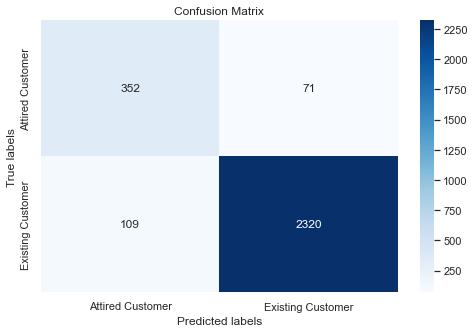

In [1879]:
cm_rf_pca , report_rf_pca = model_train_predict(clf_rf,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_rf_pca,report_rf_pca,0)



Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.52      0.78      0.62       423
Existing Customer       0.96      0.87      0.91      2429

         accuracy                           0.86      2852
        macro avg       0.74      0.83      0.77      2852
     weighted avg       0.89      0.86      0.87      2852



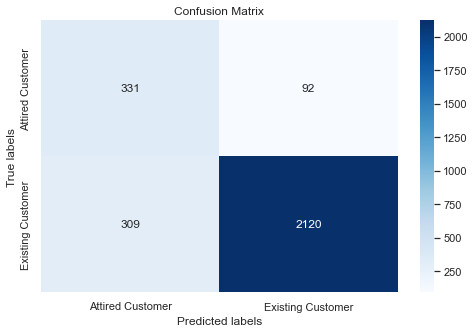

In [1880]:
cm_knn_pca , report_knn_pca = model_train_predict(clf_knn,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_knn_pca,report_knn_pca,0)

- หลังจากลดการทำ PCA เหลือแค่  ['Avg_Utilization_Ratio','Total_Revolving_Bal'] พบว่า Model มีความแม่นยำมากขึ้นกว่าเดิม 

# Experiment 2 Train Model W/ Tuned Hyper parameter compare to benchmark

In [1881]:
def Synchro_Tuner(model,grid,train_x,train_y,cv_):
    grid_search = GridSearchCV(estimator = model, param_grid = grid, 
                          cv = cv_, n_jobs = -1, verbose = 2,scoring='accuracy')
    grid_search.fit(train_x,train_y)
    return grid_search.best_params_

In [1882]:
# Decision Tree

tree_grid = { 
              'criterion' :['gini', 'entropy'],
              'max_depth' :[5,10,15,20]
            }

# Random forest
rf_grid = {
    'bootstrap': [True],
    'max_depth' :[5,10,15,20],
    'max_features': [2, 3],
    'min_samples_leaf': [3],
    'n_estimators': [20,50,100,200]
}

# K-nearest Neighbor 

knn_grid = dict(n_neighbors=list(range(1, 20)),
                weights=['uniform','distance']
                )

nn_grid = [
        {
            'activation' : ['logistic', 'tanh'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(1,1),(2,2),(3,3),(4,4)
             
             ],
            'random_state': [0]
        }
       ]
model_param_lst = [[tree_grid,clf_tree],[knn_grid,clf_knn],[rf_grid,clf_rf],[nn_grid,clf_nn]]

In [1883]:

# save_params = []
# #
# for i in range(len(model_param_lst)-1):
#     save_params.append(Synchro_Tuner(model_param_lst[i][1],model_param_lst[i][0],x_train_pca,y_train_pca,5))
# print('\nDecision Tree Parameter \n',save_params[0],'\n','Random Forest Parameter \n',save_params[2],'\n','K-nearest Neighbors Parameters \n',save_params[1])

In [1884]:
# save_params.append(Synchro_Tuner(model_param_lst[3][1],model_param_lst[3][0],x_train_pca,y_train_pca,3))

In [1885]:
save_params[3]

{'activation': 'tanh', 'hidden_layer_sizes': (7,), 'solver': 'lbfgs'}

# Decision Tree

In [1886]:
from sklearn.metrics import accuracy_score
values = [i for i in range(1, 20)]
train_scores, test_scores = list(), list()
for i in values:
	# configure the model
	model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i)
	# fit model on the training dataset
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.786, test: 0.748
>2, train: 0.786, test: 0.748
>3, train: 0.863, test: 0.903
>4, train: 0.907, test: 0.862
>5, train: 0.925, test: 0.909
>6, train: 0.945, test: 0.921
>7, train: 0.952, test: 0.926
>8, train: 0.961, test: 0.927
>9, train: 0.970, test: 0.922
>10, train: 0.977, test: 0.927
>11, train: 0.984, test: 0.917
>12, train: 0.990, test: 0.917
>13, train: 0.993, test: 0.922
>14, train: 0.996, test: 0.920
>15, train: 0.997, test: 0.927
>16, train: 0.999, test: 0.926
>17, train: 0.999, test: 0.923
>18, train: 1.000, test: 0.925
>19, train: 1.000, test: 0.924


จากการดูข้อมูลระหว่าง Train และ Test พบว่ายิ่งมี Model ยิ่งมีความลึกมากขึ้นเท่าไหร่ โมเดลจะยิ่งพยายาม fit กับข้อมูล train set มากขึ้นเรื่อย ๆ ในขณะที่ Test set มีการทำนายที่มีผลลพธ์เท่าเดิม

Data W/o Preprocessing


Classification Report :  Decision Tree
                   precision    recall  f1-score   support

Attrited Customer       0.84      0.76      0.80       488
Existing Customer       0.95      0.97      0.96      2551

         accuracy                           0.94      3039
        macro avg       0.90      0.87      0.88      3039
     weighted avg       0.94      0.94      0.94      3039



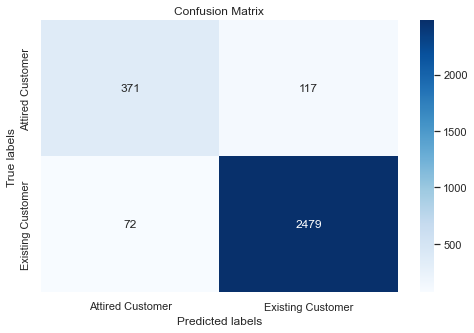

In [1887]:
print("Data W/o Preprocessing")
tuned_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
cm_tree , report_tree = model_train_predict(tuned_tree,x_train_bn,y_train_bn,x_test_bn,y_test_bn)
result(cm_tree,report_tree,1)

Data Preprocessing w/o PCA and drop high correlate feature


Classification Report :  Decision Tree
                   precision    recall  f1-score   support

Attrited Customer       0.70      0.86      0.77       423
Existing Customer       0.97      0.94      0.96      2429

         accuracy                           0.93      2852
        macro avg       0.84      0.90      0.86      2852
     weighted avg       0.93      0.93      0.93      2852



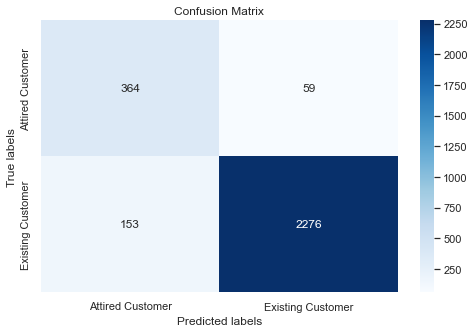

In [1888]:
print("Data Preprocessing w/o PCA and drop high correlate feature")
test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

cm_tree , report_tree = model_train_predict(tuned_tree,x_train,y_train,x_test,y_test)
result(cm_tree,report_tree,1)



Classification Report :  Decision Tree
                   precision    recall  f1-score   support

Attrited Customer       0.61      0.86      0.71       423
Existing Customer       0.97      0.90      0.94      2429

         accuracy                           0.90      2852
        macro avg       0.79      0.88      0.82      2852
     weighted avg       0.92      0.90      0.90      2852



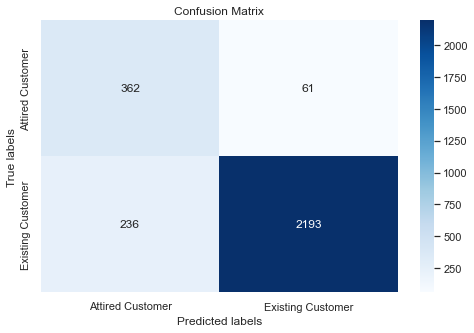

In [1889]:
cm_tree , report_tree = model_train_predict(tuned_tree,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_tree,report_tree,1)

# Random Forest

In [1890]:
values = [i for i in range(1, 15)]
train_scores, test_scores = list(), list()
for i in values:
	# configure the model
	model = RandomForestClassifier(bootstrap='True',max_depth=i,max_features=2,min_samples_leaf=3,min_samples_split=8,n_estimators=200)
	# fit model on the training dataset
	model.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.799, test: 0.785
>2, train: 0.808, test: 0.797
>3, train: 0.881, test: 0.862
>4, train: 0.912, test: 0.894
>5, train: 0.932, test: 0.913
>6, train: 0.949, test: 0.925
>7, train: 0.960, test: 0.934
>8, train: 0.969, test: 0.940
>9, train: 0.976, test: 0.945
>10, train: 0.979, test: 0.944
>11, train: 0.982, test: 0.951
>12, train: 0.986, test: 0.952
>13, train: 0.987, test: 0.951
>14, train: 0.989, test: 0.953


เมื่อเทียบการปรับ Max Depth ระหว่าง Decision Tree และ Random forest พบว่า Random forest จะหยุดการ fit ของ train set ไว้อยู่ในที่ค่า ๆ นึง โดยไม่พยายาม fit ข้อมูลให้มีการทำนายของ train data ที่ 1.00

In [1891]:
tuned_rf = RandomForestClassifier(bootstrap='True',max_depth=10,max_features=3,min_samples_leaf=3,min_samples_split=8,n_estimators=200)

Data W/o Preprocessing Benchmark


Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.92      0.51      0.65       488
Existing Customer       0.91      0.99      0.95      2551

         accuracy                           0.91      3039
        macro avg       0.92      0.75      0.80      3039
     weighted avg       0.91      0.91      0.90      3039



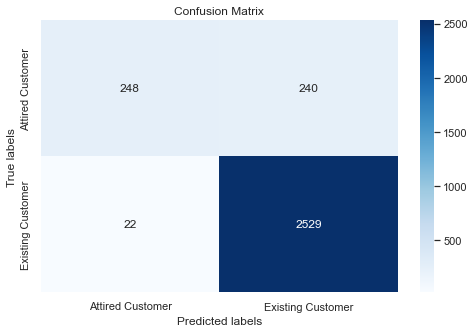

In [1892]:
print("Data W/o Preprocessing Benchmark")
cm_rf , report_rf = model_train_predict(tuned_rf,x_train_bn,y_train_bn,x_test_bn,y_test_bn)
result(cm_rf,report_rf,0)

Data Preprocessing w/o PCA and drop high correlate feature


Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.78      0.92      0.84       423
Existing Customer       0.99      0.96      0.97      2429

         accuracy                           0.95      2852
        macro avg       0.88      0.94      0.91      2852
     weighted avg       0.96      0.95      0.95      2852



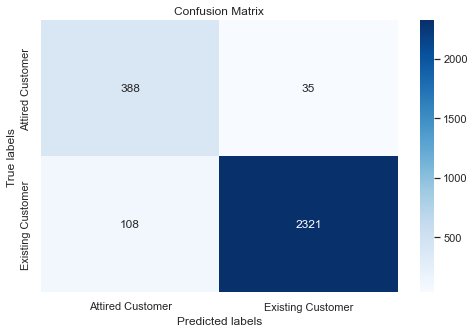

In [1893]:
print("Data Preprocessing w/o PCA and drop high correlate feature")
cm_rf , report_rf = model_train_predict(tuned_rf,x_train,y_train,x_test,y_test)
result(cm_rf,report_rf,0)

Data Preprocessing w/ PCA and drop high correlate feature


Classification Report :  Random forest
                   precision    recall  f1-score   support

Attrited Customer       0.71      0.87      0.78       423
Existing Customer       0.98      0.94      0.96      2429

         accuracy                           0.93      2852
        macro avg       0.84      0.90      0.87      2852
     weighted avg       0.94      0.93      0.93      2852



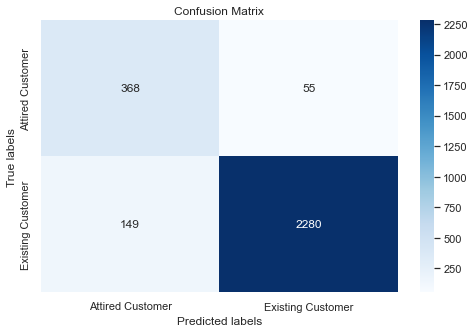

In [1894]:
print("Data Preprocessing w/ PCA and drop high correlate feature")
cm_rf , report_rf = model_train_predict(tuned_rf,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_rf,report_rf,0)

จากโมเดลของ Random forest พบว่าการ Prepocessing ภายใน Dataset นี้โดยไม่จัดการกับข้อมูล Feature ที่มีความ Correlate กันสูงมีผลลัพธ์ที่ดีที่สุด โดยที่เมื่อดูที่ f1-score ของ Class Attrited Customer พบว่ามีค่าต่างกันอยู่ที่ 0.06 ในขณะที่โมเดลที่ใช้ Train data Benchmark ที่ไม่ได้มีการทำ Data Prepocessing อย่างละเอียดมี f1-score อยู่ที่ 0.73 ซึ่งห่างจากโมเดลที่ดีที่สุดอยู่ถึง 0.13

# K-nearest Neighbor

In [1895]:
tuned_knn = KNeighborsClassifier(weights='distance',n_neighbors=10)

Data W/o Preprocessing


Classification Report :  K-nearest Neigbors
                   precision    recall  f1-score   support

Attrited Customer       0.80      0.15      0.25       488
Existing Customer       0.86      0.99      0.92      2551

         accuracy                           0.86      3039
        macro avg       0.83      0.57      0.59      3039
     weighted avg       0.85      0.86      0.81      3039



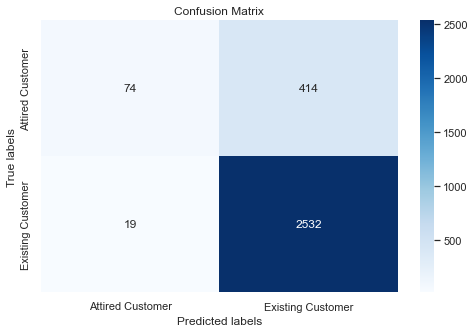

In [1896]:
print("Data W/o Preprocessing")
cm_knn , report_knn = model_train_predict(tuned_knn,x_train_bn,y_train_bn,x_test_bn,y_test_bn)
result(cm_knn,report_knn,2)

Data Preprocessing w/o PCA and drop high correlate feature


Classification Report :  K-nearest Neigbors
                   precision    recall  f1-score   support

Attrited Customer       0.59      0.86      0.70       423
Existing Customer       0.97      0.90      0.93      2429

         accuracy                           0.89      2852
        macro avg       0.78      0.88      0.82      2852
     weighted avg       0.92      0.89      0.90      2852



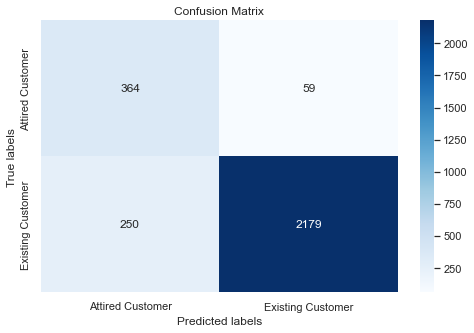

In [1897]:
print("Data Preprocessing w/o PCA and drop high correlate feature")

cm_knn , report_knn = model_train_predict(tuned_knn,x_train,y_train,x_test,y_test)
result(cm_knn,report_knn,2)



Classification Report :  K-nearest Neigbors
                   precision    recall  f1-score   support

Attrited Customer       0.52      0.78      0.62       423
Existing Customer       0.96      0.87      0.91      2429

         accuracy                           0.86      2852
        macro avg       0.74      0.83      0.77      2852
     weighted avg       0.89      0.86      0.87      2852



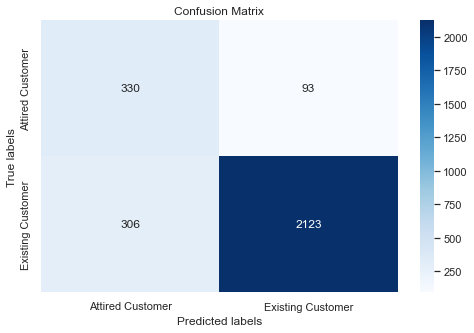

In [1898]:
cm_knn , report_knn = model_train_predict(tuned_knn,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_knn,report_knn,2)

จากโมเดลของ KNN พบว่าระหว่างการเลือกใช้ Data ที่ผ่าน Prepocessing และไม่ผ่าน Prepocessing มีมีผลลัพธ์ความแม่นยำในการทำนายที่แตกต่างกันมากกว่าโมเดลแบบอื่น ๆ ซึ่งอาจจะเป็นเพราะ Feature ที่ไม่สำคัญที่เยอะมากจนเกินไปทำให้โมเดลที่ได้ไม่สามารถทำนายผลลัพธ์ที่ได้มากเพียงพอ จึงอาจจะบอกได้ว่าโมเดล K-nearest Neighbor นั้น Sensitive ต่อ Noise ภายใน training data

# Neural Network

In [1899]:
tuned_nn = MLPClassifier(activation='tanh',hidden_layer_sizes=(7,),solver='lbfgs',max_iter=10000,random_state=0)

Data W/o Preprocessing


c:\Users\66961\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)




Classification Report :  K-nearest Neigbors
                   precision    recall  f1-score   support

Attrited Customer       0.81      0.80      0.81       488
Existing Customer       0.96      0.96      0.96      2551

         accuracy                           0.94      3039
        macro avg       0.89      0.88      0.88      3039
     weighted avg       0.94      0.94      0.94      3039



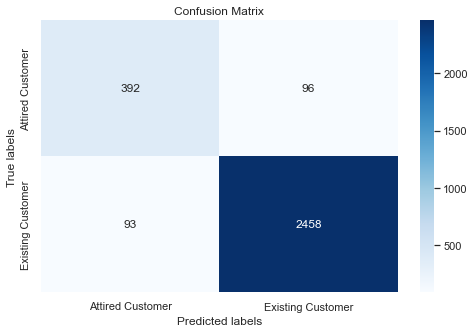

In [1900]:
print("Data W/o Preprocessing")
cm_nn , report_nn = model_train_predict(tuned_nn,x_train_bn,y_train_bn,x_test_bn,y_test_bn)
result(cm_nn,report_nn,2)

Data Preprocessing w/o PCA and drop high correlate feature


Classification Report :  K-nearest Neigbors
                   precision    recall  f1-score   support

Attrited Customer       0.62      0.89      0.73       423
Existing Customer       0.98      0.90      0.94      2429

         accuracy                           0.90      2852
        macro avg       0.80      0.90      0.83      2852
     weighted avg       0.93      0.90      0.91      2852



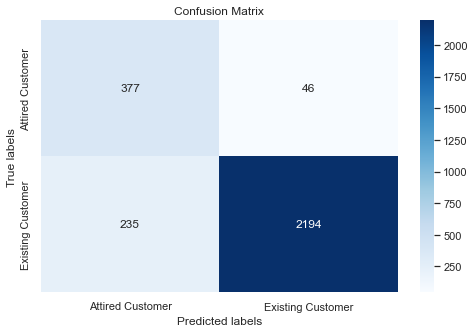

In [1901]:
print("Data Preprocessing w/o PCA and drop high correlate feature")
cm_nn , report_nn = model_train_predict(tuned_nn,x_train,y_train,x_test,y_test)
result(cm_nn,report_nn,2)

Data Preprocessing w/ PCA and drop high correlate feature


Classification Report :  K-nearest Neigbors
                   precision    recall  f1-score   support

Attrited Customer       0.61      0.92      0.73       423
Existing Customer       0.98      0.90      0.94      2429

         accuracy                           0.90      2852
        macro avg       0.80      0.91      0.84      2852
     weighted avg       0.93      0.90      0.91      2852



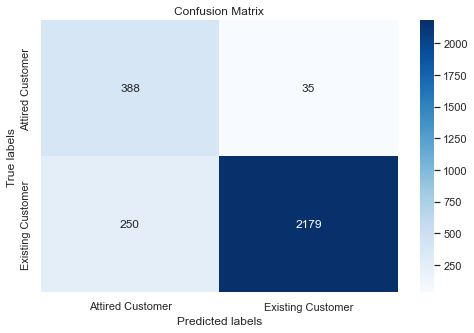

In [1902]:
print("Data Preprocessing w/ PCA and drop high correlate feature")
cm_nn , report_nn = model_train_predict(tuned_nn,x_train_pca,y_train_pca,x_test_pca,y_test_pca)
result(cm_nn,report_nn,2)

# Result Analysis

- การเลือก Feature โดยการเลือกจากค่า Correlation ระหว่าง Feature และ Output ที่มีค่าสูงช่วยทำให้การฝึกของโมเดลได้ดีขึ้น และช่วยทำให้ตัด Feature ที่ไม่สำคัญออกไปได้ง่ายขึ้น
- Model ที่ผ่านการทำ Preprocessing สามารถทำให้โมเดลมีการทำนายผลที่แม่นยำมากขึ้น
- การทำ PCA กับ Feature ที่มีความ Correlate กันสูง เพื่อเป็นการลดปริมาณ Feature บางครั้งอาจทำให้ข้อมูล หรือการเกาะกลุ่มกันของข้อมูลแย่ลงกว่าเดิมได้ ทำให้ผลลัพธ์การทำนายของโมเดลแย่ลง
- การปรับ Max-depth ของ Decision Tree และ Random forest มีผลต่อการ Underfit หรือ Overfit ของโมเดลได้
- K-nearest Neighbor มีความ Sensitive ต่อ noise สูงมาก
- Decision Tree มีโอกาสในการเกิด Overfit สูงมากกว่า Random forest 

# Conclusion

- การเลือกใช้ Random-forest โดยเลือกใช้ Data Prepocessing โดยไม่ผ่าน PCA จะเป็นตัวเลือกที่ดีที่สุด เพราะมีค่า Precision และ Recall ของ Attrited Customer ที่สูงมากกว่าเมื่อเทียบกับโมเดลอื่น ๆ ซึ่งจะทำให้สามารถติดต่อกับลูกค้าที่มีแนวโน้มจะเลิกใช้บริการเพื่อหาสาเหตุ หรือติดต่อเพื่อให้ลูกค้าคงใช้บริการต่อไป
